<a href="https://colab.research.google.com/github/Mayur290/speech-emotion-recognition/blob/master/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Initial setup

In [10]:
!pip install python_speech_features
!pip install audiolazy

In [0]:
from python_speech_features import mfcc, fbank, logfbank, ssc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from google.colab import drive, files
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# FOR LPC FEATURE EXTRACTION
import wave
import scipy.io.wavfile as wav
from scipy import signal
import scipy as sk
from audiolazy import *
from audiolazy import lpc
from sklearn import preprocessing
import scipy.signal as sig
import scipy.linalg as linalg


In [12]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import keras
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from keras.layers.normalization import BatchNormalization

# Loading data

In [0]:
# Loading the saved data
X_mfcc_ssc_lpc1 = pd.DataFrame(np.load('/content/gdrive/My Drive/Minor_Sem6/features_data/X_mfcc_ssc_lpc.npy', allow_pickle=True))
X_mfcc_ssc1 = pd.DataFrame(np.load('/content/gdrive/My Drive/Minor_Sem6/features_data/X_mfcc_ssc.npy', allow_pickle=True))
X_mfcc_lpc1 = pd.DataFrame(np.load('/content/gdrive/My Drive/Minor_Sem6/features_data/X_mfcc_lpc.npy', allow_pickle=True))
X_ssc_lpc1 = pd.DataFrame(np.load('/content/gdrive/My Drive/Minor_Sem6/features_data/X_ssc_lpc.npy', allow_pickle=True))
X_mfcc1 = pd.DataFrame(np.load('/content/gdrive/My Drive/Minor_Sem6/features_data/X_mfcc.npy', allow_pickle=True))
X_ssc1 = pd.DataFrame(np.load('/content/gdrive/My Drive/Minor_Sem6/features_data/X_ssc.npy', allow_pickle=True))
X_lpc1 = pd.DataFrame(np.load('/content/gdrive/My Drive/Minor_Sem6/features_data/X_lpc.npy', allow_pickle=True))
y1 = pd.DataFrame(np.load('/content/gdrive/My Drive/Minor_Sem6/features_data/y.npy', allow_pickle=True))

In [0]:
# Scaling the data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_mfcc_ssc_lpc1 = sc.fit_transform(X_mfcc_ssc_lpc1)
X_mfcc_ssc1 = sc.fit_transform(X_mfcc_ssc1)
X_mfcc_lpc1 = sc.fit_transform(X_mfcc_lpc1)
X_ssc_lpc1 = sc.fit_transform(X_ssc_lpc1)
X_mfcc1 = sc.fit_transform(X_mfcc1)
X_ssc1 = sc.fit_transform(X_ssc1)
X_lpc1 = sc.fit_transform(X_lpc1)




# Training CNN model

---



# mfcc+ssc+lpc

In [0]:
# Considering only mfcc+ssc+lpc

X_train_mfcc_ssc_lpc, X_test_mfcc_ssc_lpc, y_train_mfcc_ssc_lpc, y_test_mfcc_ssc_lpc = train_test_split(X_mfcc_ssc_lpc1, y1, test_size=0.2, random_state=0)
x_traincnn =np.expand_dims(X_train_mfcc_ssc_lpc, axis=2)
x_testcnn= np.expand_dims(X_test_mfcc_ssc_lpc, axis=2)


In [16]:
print(X_train_mfcc_ssc_lpc.shape[1])

286


In [0]:
model = Sequential()

model.add(Conv1D(256, 5,padding='same',input_shape=(286,1)))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=(8)))

model.add(Conv1D(128, 5,padding='same',))
model.add(BatchNormalization())                  
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Dropout(0.1))

model.add(Conv1D(128, 5,padding='same',))                  
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Conv1D(128, 5,padding='same',)) 
model.add(BatchNormalization())                 
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Flatten())
model.add(Dense(8))                                                           
model.add(Activation('softmax'))
opt = keras.optimizers.rmsprop(lr=0.00005,epsilon=1e-08,rho=0.9,decay=0.0)

In [22]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_3 (Conv1D)            (None, 286, 256)          1536      
_________________________________________________________________
activation_2 (Activation)    (None, 286, 256)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 286, 256)          0         
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 35, 256)           0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 35, 128)           163968    
_________________________________________________________________
batch_normalization_1 (Batch (None, 35, 128)           512       
_________________________________________________________________
activation_3 (Activation)    (None, 35, 128)          

In [0]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=opt,metrics=['accuracy'])
cnnhistory=model.fit(x_traincnn, y_train_mfcc_ssc_lpc, batch_size=20, epochs=150, validation_data=(x_testcnn, y_test_mfcc_ssc_lpc))
model.save('/content/gdrive/My Drive/feature/MFCC_SSC_LPC.h5')

Train on 3828 samples, validate on 957 samples
Epoch 1/150
3828/3828 [==============================] - 12s 3ms/step - loss: 2.0043 - accuracy: 0.2369 - val_loss: 2.0571 - val_accuracy: 0.1724
Epoch 2/150
3828/3828 [==============================] - 12s 3ms/step - loss: 1.7785 - accuracy: 0.3190 - val_loss: 1.8294 - val_accuracy: 0.2727
Epoch 3/150
3828/3828 [==============================] - 12s 3ms/step - loss: 1.6579 - accuracy: 0.3665 - val_loss: 1.6063 - val_accuracy: 0.3971
Epoch 4/150
3828/3828 [==============================] - 12s 3ms/step - loss: 1.5686 - accuracy: 0.3994 - val_loss: 1.5014 - val_accuracy: 0.4462
Epoch 5/150
3828/3828 [==============================] - 12s 3ms/step - loss: 1.4902 - accuracy: 0.4420 - val_loss: 1.4863 - val_accuracy: 0.4629
Epoch 6/150
3828/3828 [==============================] - 12s 3ms/step - loss: 1.4280 - accuracy: 0.4783 - val_loss: 1.4181 - val_accuracy: 0.4796
Epoch 7/150
3828/3828 [==============================] - 12s 3ms/step - loss:

In [0]:
mfcc_ssc_lpc_accuracy = cnnhistory.history['val_accuracy']
mfcc_ssc_lpc_model = model
print(mfcc_ssc_lpc_accuracy)

[0.17241379618644714, 0.27272728085517883, 0.3970741927623749, 0.44618600606918335, 0.4629049003124237, 0.47962382435798645, 0.5088819265365601, 0.5297805666923523, 0.5381399989128113, 0.5370950698852539, 0.554858922958374, 0.5297805666923523, 0.5381399989128113, 0.5653082728385925, 0.5882967710494995, 0.5820271968841553, 0.6060606241226196, 0.6029258370399475, 0.6039707660675049, 0.6133751273155212, 0.6081504821777344, 0.5997909903526306, 0.6321839094161987, 0.6112852692604065, 0.6332288384437561, 0.6259143352508545, 0.6405433416366577, 0.6520376205444336, 0.6489028334617615, 0.6415882706642151, 0.6509926915168762, 0.6426331996917725, 0.6541274785995483, 0.6509926915168762, 0.6572622656822205, 0.6562173366546631, 0.6489028334617615, 0.6729362607002258, 0.6478579044342041, 0.6729362607002258, 0.6698014736175537, 0.6771159768104553, 0.66144198179245, 0.6603970527648926, 0.638453483581543, 0.6739811897277832, 0.6624869108200073, 0.6603970527648926, 0.6823406219482422, 0.6635318994522095,

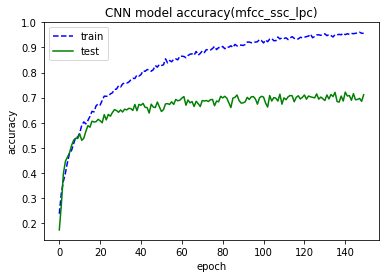

In [0]:
plt.plot(cnnhistory.history['accuracy'],'b', linestyle='--', label='train')
plt.plot(cnnhistory.history['val_accuracy'],'g', linestyle='-', label='test')
plt.title('CNN model accuracy(mfcc_ssc_lpc)')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()

In [26]:
from keras.models import load_model
mfcc_ssc_lpc_model = load_model('/content/gdrive/My Drive/Minor_Sem6/CNN Models(of features)/MFCC_SSC_LPC.h5')
loss, acc = mfcc_ssc_lpc_model.evaluate(x_testcnn, y_test_mfcc_ssc_lpc)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))
msl = acc
# print(msl)

957/957 [==============================] - 1s 815us/step
Restored model, accuracy: 71.16%


# mfcc+ssc

In [0]:
# Considering only mfcc+ssc

X_train_mfcc_ssc, X_test_mfcc_ssc, y_train_mfcc_ssc, y_test_mfcc_ssc = train_test_split(X_mfcc_ssc1, y1, test_size=0.2, random_state=0)
x_traincnn =np.expand_dims(X_train_mfcc_ssc, axis=2)
x_testcnn= np.expand_dims(X_test_mfcc_ssc, axis=2)


In [0]:
print(X_train_mfcc_ssc.shape[1])

273


In [0]:
model = Sequential()

model.add(Conv1D(256, 5,padding='same',input_shape=(273,1)))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=(8)))

model.add(Conv1D(128, 5,padding='same',))
model.add(BatchNormalization())                  
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Dropout(0.1))

model.add(Conv1D(128, 5,padding='same',))                  
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Conv1D(128, 5,padding='same',)) 
model.add(BatchNormalization())                 
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Flatten())
model.add(Dense(8))                                                           
model.add(Activation('softmax'))
opt = keras.optimizers.rmsprop(lr=0.00005,epsilon=1e-08,rho=0.9,decay=0.0)

In [0]:
model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_57 (Conv1D)           (None, 273, 256)          1536      
_________________________________________________________________
activation_69 (Activation)   (None, 273, 256)          0         
_________________________________________________________________
dropout_53 (Dropout)         (None, 273, 256)          0         
_________________________________________________________________
max_pooling1d_32 (MaxPooling (None, 34, 256)           0         
_________________________________________________________________
conv1d_58 (Conv1D)           (None, 34, 128)           163968    
_________________________________________________________________
batch_normalization_29 (Batc (None, 34, 128)           512       
_________________________________________________________________
activation_70 (Activation)   (None, 34, 128)         

In [0]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=opt,metrics=['accuracy'])
cnnhistory=model.fit(x_traincnn, y_train_mfcc_ssc, batch_size=20, epochs=150, validation_data=(x_testcnn, y_test_mfcc_ssc))
model.save('/content/gdrive/My Drive/feature/MFCC_SSC.h5')

Train on 3828 samples, validate on 957 samples
Epoch 1/150
3828/3828 [==============================] - 12s 3ms/step - loss: 2.0212 - accuracy: 0.2265 - val_loss: 2.0667 - val_accuracy: 0.1599
Epoch 2/150
3828/3828 [==============================] - 12s 3ms/step - loss: 1.7517 - accuracy: 0.3297 - val_loss: 1.8017 - val_accuracy: 0.3281
Epoch 3/150
3828/3828 [==============================] - 12s 3ms/step - loss: 1.6307 - accuracy: 0.3783 - val_loss: 1.6080 - val_accuracy: 0.3908
Epoch 4/150
3828/3828 [==============================] - 12s 3ms/step - loss: 1.5446 - accuracy: 0.4271 - val_loss: 1.4929 - val_accuracy: 0.4514
Epoch 5/150
3828/3828 [==============================] - 12s 3ms/step - loss: 1.4891 - accuracy: 0.4446 - val_loss: 1.4393 - val_accuracy: 0.4817
Epoch 6/150
3828/3828 [==============================] - 11s 3ms/step - loss: 1.4143 - accuracy: 0.4754 - val_loss: 1.3863 - val_accuracy: 0.4953
Epoch 7/150
3828/3828 [==============================] - 12s 3ms/step - loss:

In [0]:
mfcc_ssc_accuracy = cnnhistory.history['val_accuracy']
mfcc_ssc_model = model
print(mfcc_ssc_accuracy)

[0.15987460315227509, 0.32810866832733154, 0.39080458879470825, 0.4514106512069702, 0.4817136824131012, 0.4952978193759918, 0.5015674233436584, 0.5005224943161011, 0.5287356376647949, 0.5673981308937073, 0.5350052118301392, 0.5412748456001282, 0.5663532018661499, 0.5820271968841553, 0.5768024921417236, 0.5956112742424011, 0.5956112742424011, 0.5903866291046143, 0.5997909903526306, 0.6185997724533081, 0.607105553150177, 0.6217345595359802, 0.6196447014808655, 0.6290491223335266, 0.6363636255264282, 0.6509926915168762, 0.6541274785995483, 0.6311389803886414, 0.6436781883239746, 0.6541274785995483, 0.66144198179245, 0.6499477624893188, 0.6541274785995483, 0.6572622656822205, 0.6729362607002258, 0.6520376205444336, 0.6436781883239746, 0.6729362607002258, 0.6729362607002258, 0.6645768284797668, 0.6666666865348816, 0.6739811897277832, 0.6729362607002258, 0.66144198179245, 0.638453483581543, 0.6645768284797668, 0.6635318994522095, 0.653082549571991, 0.6812956929206848, 0.6802507638931274, 0.6

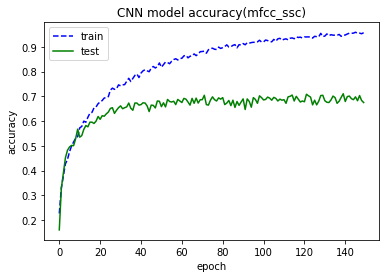

In [0]:
plt.plot(cnnhistory.history['accuracy'],'b', linestyle='--', label='train')
plt.plot(cnnhistory.history['val_accuracy'],'g', linestyle='-', label='test')
plt.title('CNN model accuracy(mfcc_ssc)')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()

In [29]:
mfcc_ssc_model = load_model('/content/gdrive/My Drive/Minor_Sem6/CNN Models(of features)/MFCC_SSC.h5')
loss, acc = mfcc_ssc_model.evaluate(x_testcnn, y_test_mfcc_ssc)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))
ms = acc
# print(ms)

957/957 [==============================] - 1s 556us/step
Restored model, accuracy: 67.50%


# mfcc+lpc

In [0]:
# Considering only mfcc+lpc

X_train_mfcc_lpc, X_test_mfcc_lpc, y_train_mfcc_lpc, y_test_mfcc_lpc = train_test_split(X_mfcc_lpc1, y1, test_size=0.2, random_state=0)
x_traincnn =np.expand_dims(X_train_mfcc_lpc, axis=2)
x_testcnn= np.expand_dims(X_test_mfcc_lpc, axis=2)


In [0]:
print(X_train_mfcc_lpc.shape[1])

104


In [0]:
model = Sequential()

model.add(Conv1D(128, 5,padding='same',input_shape=(104,1)))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=(8)))

model.add(Conv1D(128, 5,padding='same',))
model.add(BatchNormalization())                  
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Dropout(0.1))

model.add(Conv1D(128, 5,padding='same',))                  
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Conv1D(128, 5,padding='same',)) 
model.add(BatchNormalization())                 
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Flatten())
model.add(Dense(8))                                                           
model.add(Activation('softmax'))
opt = keras.optimizers.rmsprop(lr=0.00005,epsilon=1e-08,rho=0.9,decay=0.0)

In [0]:
model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_61 (Conv1D)           (None, 104, 128)          768       
_________________________________________________________________
activation_74 (Activation)   (None, 104, 128)          0         
_________________________________________________________________
dropout_57 (Dropout)         (None, 104, 128)          0         
_________________________________________________________________
max_pooling1d_34 (MaxPooling (None, 13, 128)           0         
_________________________________________________________________
conv1d_62 (Conv1D)           (None, 13, 128)           82048     
_________________________________________________________________
batch_normalization_31 (Batc (None, 13, 128)           512       
_________________________________________________________________
activation_75 (Activation)   (None, 13, 128)         

In [0]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=opt,metrics=['accuracy'])
cnnhistory=model.fit(x_traincnn, y_train_mfcc_lpc, batch_size=20, epochs=150, validation_data=(x_testcnn, y_test_mfcc_lpc))
model.save('/content/gdrive/My Drive/feature/MFCC_LPC.h5')

Train on 3828 samples, validate on 957 samples
Epoch 1/150
3828/3828 [==============================] - 4s 922us/step - loss: 2.2629 - accuracy: 0.1609 - val_loss: 2.0882 - val_accuracy: 0.1452
Epoch 2/150
3828/3828 [==============================] - 3s 805us/step - loss: 2.1306 - accuracy: 0.1863 - val_loss: 2.0113 - val_accuracy: 0.2121
Epoch 3/150
3828/3828 [==============================] - 3s 797us/step - loss: 2.0270 - accuracy: 0.2252 - val_loss: 1.8695 - val_accuracy: 0.2978
Epoch 4/150
3828/3828 [==============================] - 3s 811us/step - loss: 1.9697 - accuracy: 0.2364 - val_loss: 1.7907 - val_accuracy: 0.3344
Epoch 5/150
3828/3828 [==============================] - 3s 827us/step - loss: 1.8931 - accuracy: 0.2761 - val_loss: 1.7440 - val_accuracy: 0.3615
Epoch 6/150
3828/3828 [==============================] - 3s 816us/step - loss: 1.8395 - accuracy: 0.2981 - val_loss: 1.7149 - val_accuracy: 0.3605
Epoch 7/150
3828/3828 [==============================] - 3s 799us/step 

In [0]:
mfcc_lpc_accuracy = cnnhistory.history['val_accuracy']
mfcc_lpc_model = model
print(mfcc_lpc_accuracy)

[0.14524555206298828, 0.21212121844291687, 0.29780563712120056, 0.33437827229499817, 0.36154648661613464, 0.36050155758857727, 0.369905948638916, 0.3928944766521454, 0.39080458879470825, 0.4137931168079376, 0.4263322949409485, 0.44305118918418884, 0.4440961480140686, 0.4367816150188446, 0.4440961480140686, 0.45663532614707947, 0.48275861144065857, 0.4733542203903198, 0.4743991494178772, 0.47230929136276245, 0.47544410824775696, 0.4879832863807678, 0.47962382435798645, 0.49007314443588257, 0.47230929136276245, 0.49425286054611206, 0.5057471394538879, 0.5099268555641174, 0.5036572813987732, 0.5224660634994507, 0.5120167136192322, 0.4994775354862213, 0.5235109925270081, 0.5276907086372375, 0.5245559215545654, 0.5339602828025818, 0.5339602828025818, 0.5193312168121338, 0.5381399989128113, 0.5454545617103577, 0.5381399989128113, 0.5444096326828003, 0.5360501408576965, 0.5370950698852539, 0.5350052118301392, 0.5391849279403687, 0.5475444197654724, 0.5433647036552429, 0.5642633438110352, 0.56

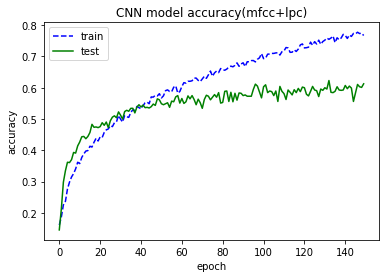

In [0]:
plt.plot(cnnhistory.history['accuracy'],'b', linestyle='--', label='train')
plt.plot(cnnhistory.history['val_accuracy'],'g', linestyle='-', label='test')
plt.title('CNN model accuracy(mfcc+lpc)')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()

In [31]:
mfcc_lpc_model = load_model('/content/gdrive/My Drive/Minor_Sem6/CNN Models(of features)/MFCC_LPC.h5')
loss, acc = mfcc_lpc_model.evaluate(x_testcnn, y_test_mfcc_lpc)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))
ml = acc
# print(ml)

957/957 [==============================] - 0s 210us/step
Restored model, accuracy: 61.23%


# ssc+lpc

In [0]:
# Considering only ssc+lpc

X_train_ssc_lpc, X_test_ssc_lpc, y_train_ssc_lpc, y_test_ssc_lpc = train_test_split(X_ssc_lpc1, y1, test_size=0.2, random_state=0)
x_traincnn =np.expand_dims(X_train_ssc_lpc, axis=2)
x_testcnn= np.expand_dims(X_test_ssc_lpc, axis=2)


In [0]:
print(X_train_ssc_lpc.shape[1])

195


In [0]:
model = Sequential()

model.add(Conv1D(256, 5,padding='same',input_shape=(195,1)))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=(8)))

model.add(Conv1D(128, 5,padding='same',))
model.add(BatchNormalization())                  
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Dropout(0.1))

model.add(Conv1D(128, 5,padding='same',))                  
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Conv1D(128, 5,padding='same',)) 
model.add(BatchNormalization())                 
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Flatten())
model.add(Dense(8))                                                           
model.add(Activation('softmax'))
opt = keras.optimizers.rmsprop(lr=0.00005,epsilon=1e-08,rho=0.9,decay=0.0)

In [0]:
model.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_69 (Conv1D)           (None, 195, 256)          1536      
_________________________________________________________________
activation_84 (Activation)   (None, 195, 256)          0         
_________________________________________________________________
dropout_65 (Dropout)         (None, 195, 256)          0         
_________________________________________________________________
max_pooling1d_38 (MaxPooling (None, 24, 256)           0         
_________________________________________________________________
conv1d_70 (Conv1D)           (None, 24, 128)           163968    
_________________________________________________________________
batch_normalization_35 (Batc (None, 24, 128)           512       
_________________________________________________________________
activation_85 (Activation)   (None, 24, 128)         

In [0]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=opt,metrics=['accuracy'])
cnnhistory=model.fit(x_traincnn, y_train_ssc_lpc, batch_size=20, epochs=150, validation_data=(x_testcnn, y_test_ssc_lpc))
model.save('/content/gdrive/My Drive/feature/SSC_LPC.h5')

Train on 3828 samples, validate on 957 samples
Epoch 1/150
3828/3828 [==============================] - 9s 2ms/step - loss: 1.9972 - accuracy: 0.2369 - val_loss: 2.0464 - val_accuracy: 0.1829
Epoch 2/150
3828/3828 [==============================] - 9s 2ms/step - loss: 1.7691 - accuracy: 0.3200 - val_loss: 1.8300 - val_accuracy: 0.2717
Epoch 3/150
3828/3828 [==============================] - 9s 2ms/step - loss: 1.6742 - accuracy: 0.3519 - val_loss: 1.6198 - val_accuracy: 0.3950
Epoch 4/150
3828/3828 [==============================] - 9s 2ms/step - loss: 1.6000 - accuracy: 0.3900 - val_loss: 1.5825 - val_accuracy: 0.4107
Epoch 5/150
3828/3828 [==============================] - 9s 2ms/step - loss: 1.5182 - accuracy: 0.4219 - val_loss: 1.5181 - val_accuracy: 0.4378
Epoch 6/150
3828/3828 [==============================] - 9s 2ms/step - loss: 1.4694 - accuracy: 0.4480 - val_loss: 1.4407 - val_accuracy: 0.4796
Epoch 7/150
3828/3828 [==============================] - 9s 2ms/step - loss: 1.4054

In [0]:
ssc_lpc_accuracy = cnnhistory.history['val_accuracy']
ssc_lpc_model = model
print(ssc_lpc_accuracy)

[0.18286311626434326, 0.27168235182762146, 0.39498433470726013, 0.4106582999229431, 0.437826544046402, 0.47962382435798645, 0.46185997128486633, 0.4806687533855438, 0.49111807346343994, 0.5078369975090027, 0.5266457796096802, 0.5088819265365601, 0.5203761458396912, 0.5370950698852539, 0.5391849279403687, 0.5653082728385925, 0.5715778470039368, 0.5590386390686035, 0.5768024921417236, 0.5684430599212646, 0.5872518420219421, 0.5611284971237183, 0.5862069129943848, 0.5590386390686035, 0.5830721259117126, 0.5653082728385925, 0.5611284971237183, 0.5820271968841553, 0.5715778470039368, 0.5997909903526306, 0.6123301982879639, 0.5517241358757019, 0.600835919380188, 0.6217345595359802, 0.5715778470039368, 0.607105553150177, 0.6091954112052917, 0.6175548434257507, 0.6290491223335266, 0.6185997724533081, 0.6029258370399475, 0.6050156950950623, 0.592476487159729, 0.6311389803886414, 0.5966562032699585, 0.6269592642784119, 0.6248694062232971, 0.5569487810134888, 0.6415882706642151, 0.614420056343078

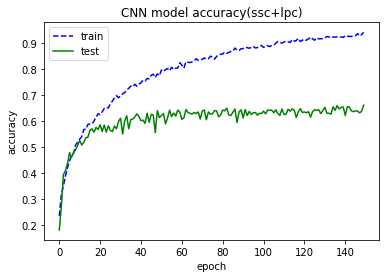

In [0]:
plt.plot(cnnhistory.history['accuracy'],'b', linestyle='--', label='train')
plt.plot(cnnhistory.history['val_accuracy'],'g', linestyle='-', label='test')
plt.title('CNN model accuracy(ssc+lpc)')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()

In [33]:
ssc_lpc_model = load_model('/content/gdrive/My Drive/Minor_Sem6/CNN Models(of features)/SSC_LPC.h5')
loss, acc = ssc_lpc_model.evaluate(x_testcnn, y_test_ssc_lpc)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))
sl = acc
# print(sl)

957/957 [==============================] - 0s 426us/step
Restored model, accuracy: 66.25%


# mfcc

In [0]:
# Considering only mfcc

X_train_mfcc, X_test_mfcc, y_train_mfcc, y_test_mfcc = train_test_split(X_mfcc1, y1, test_size=0.2, random_state=0)
x_traincnn =np.expand_dims(X_train_mfcc, axis=2)
x_testcnn= np.expand_dims(X_test_mfcc, axis=2)


In [0]:
print(X_train_mfcc.shape[1])

91


In [0]:
model = Sequential()

model.add(Conv1D(128, 5,padding='same',input_shape=(91,1)))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=(8)))

model.add(Conv1D(128, 5,padding='same',))
model.add(BatchNormalization())                  
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Dropout(0.1))

model.add(Conv1D(128, 5,padding='same',))                  
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Conv1D(128, 5,padding='same',)) 
model.add(BatchNormalization())                 
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Flatten())
model.add(Dense(8))                                                           
model.add(Activation('softmax'))
opt = keras.optimizers.rmsprop(lr=0.00005,epsilon=1e-08,rho=0.9,decay=0.0)

In [0]:
model.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_73 (Conv1D)           (None, 91, 128)           768       
_________________________________________________________________
activation_89 (Activation)   (None, 91, 128)           0         
_________________________________________________________________
dropout_69 (Dropout)         (None, 91, 128)           0         
_________________________________________________________________
max_pooling1d_40 (MaxPooling (None, 11, 128)           0         
_________________________________________________________________
conv1d_74 (Conv1D)           (None, 11, 128)           82048     
_________________________________________________________________
batch_normalization_37 (Batc (None, 11, 128)           512       
_________________________________________________________________
activation_90 (Activation)   (None, 11, 128)         

In [0]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=opt,metrics=['accuracy'])
cnnhistory=model.fit(x_traincnn, y_train_mfcc, batch_size=20, epochs=150, validation_data=(x_testcnn, y_test_mfcc))
model.save('/content/gdrive/My Drive/feature/MFCC.h5')

Train on 3828 samples, validate on 957 samples
Epoch 1/150
3828/3828 [==============================] - 3s 854us/step - loss: 2.3395 - accuracy: 0.1476 - val_loss: 2.0721 - val_accuracy: 0.2017
Epoch 2/150
3828/3828 [==============================] - 3s 730us/step - loss: 2.1305 - accuracy: 0.1933 - val_loss: 1.9951 - val_accuracy: 0.2435
Epoch 3/150
3828/3828 [==============================] - 3s 733us/step - loss: 2.0172 - accuracy: 0.2200 - val_loss: 1.8746 - val_accuracy: 0.2811
Epoch 4/150
3828/3828 [==============================] - 3s 740us/step - loss: 1.9658 - accuracy: 0.2432 - val_loss: 1.8048 - val_accuracy: 0.3197
Epoch 5/150
3828/3828 [==============================] - 3s 728us/step - loss: 1.9159 - accuracy: 0.2552 - val_loss: 1.7543 - val_accuracy: 0.3427
Epoch 6/150
3828/3828 [==============================] - 3s 733us/step - loss: 1.8614 - accuracy: 0.2759 - val_loss: 1.7175 - val_accuracy: 0.3668
Epoch 7/150
3828/3828 [==============================] - 3s 752us/step 

In [0]:
mfcc_accuracy = cnnhistory.history['val_accuracy']
mfcc_model = model
print(mfcc_accuracy)

[0.20167189836502075, 0.24346917867660522, 0.2810867428779602, 0.31974920630455017, 0.34273773431777954, 0.3667711615562439, 0.369905948638916, 0.3887147307395935, 0.3970741927623749, 0.40543365478515625, 0.4294670820236206, 0.445141077041626, 0.42842215299606323, 0.43469175696372986, 0.4597701132297516, 0.4440961480140686, 0.4670846462249756, 0.4743991494178772, 0.4806687533855438, 0.47962382435798645, 0.4932079315185547, 0.4660397171974182, 0.5015674233436584, 0.5036572813987732, 0.5057471394538879, 0.49843260645866394, 0.5141065716743469, 0.4817136824131012, 0.5067920684814453, 0.517241358757019, 0.5256008505821228, 0.5036572813987732, 0.5099268555641174, 0.5235109925270081, 0.5078369975090027, 0.5120167136192322, 0.5109717845916748, 0.5256008505821228, 0.5370950698852539, 0.5151515007019043, 0.5099268555641174, 0.5454545617103577, 0.5370950698852539, 0.5506792068481445, 0.5329153537750244, 0.5496342778205872, 0.5423197746276855, 0.531870424747467, 0.517241358757019, 0.5538139939308

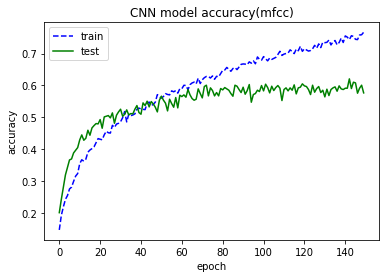

In [0]:
plt.plot(cnnhistory.history['accuracy'],'b', linestyle='--', label='train')
plt.plot(cnnhistory.history['val_accuracy'],'g', linestyle='-', label='test')
plt.title('CNN model accuracy(mfcc)')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()

In [35]:
mfcc_model = load_model('/content/gdrive/My Drive/Minor_Sem6/CNN Models(of features)/MFCC.h5')
loss, acc = mfcc_model.evaluate(x_testcnn, y_test_mfcc)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))
m=acc
# print(m)

957/957 [==============================] - 0s 215us/step
Restored model, accuracy: 57.68%


# ssc

In [0]:
# Considering only ssc

X_train_ssc, X_test_ssc, y_train_ssc, y_test_ssc = train_test_split(X_ssc1, y1, test_size=0.2, random_state=0)
x_traincnn =np.expand_dims(X_train_ssc, axis=2)
x_testcnn= np.expand_dims(X_test_ssc, axis=2)


In [0]:
print(X_train_ssc.shape[1])

182


In [0]:
model = Sequential()

model.add(Conv1D(256, 5,padding='same',input_shape=(182,1)))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=(8)))

model.add(Conv1D(128, 5,padding='same',))
model.add(BatchNormalization())                  
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Dropout(0.1))

model.add(Conv1D(128, 5,padding='same',))                  
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Conv1D(128, 5,padding='same',)) 
model.add(BatchNormalization())                 
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Flatten())
model.add(Dense(8))                                                           
model.add(Activation('softmax'))
opt = keras.optimizers.rmsprop(lr=0.00005,epsilon=1e-08,rho=0.9,decay=0.0)

In [0]:
model.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_77 (Conv1D)           (None, 182, 256)          1536      
_________________________________________________________________
activation_94 (Activation)   (None, 182, 256)          0         
_________________________________________________________________
dropout_73 (Dropout)         (None, 182, 256)          0         
_________________________________________________________________
max_pooling1d_42 (MaxPooling (None, 22, 256)           0         
_________________________________________________________________
conv1d_78 (Conv1D)           (None, 22, 128)           163968    
_________________________________________________________________
batch_normalization_39 (Batc (None, 22, 128)           512       
_________________________________________________________________
activation_95 (Activation)   (None, 22, 128)         

In [0]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=opt,metrics=['accuracy'])
cnnhistory=model.fit(x_traincnn, y_train_ssc, batch_size=20, epochs=150, validation_data=(x_testcnn, y_test_ssc))
model.save('/content/gdrive/My Drive/feature/SSC.h5')

Train on 3828 samples, validate on 957 samples
Epoch 1/150
3828/3828 [==============================] - 9s 2ms/step - loss: 2.0430 - accuracy: 0.2098 - val_loss: 2.0685 - val_accuracy: 0.1985
Epoch 2/150
3828/3828 [==============================] - 8s 2ms/step - loss: 1.8362 - accuracy: 0.2871 - val_loss: 1.8922 - val_accuracy: 0.2727
Epoch 3/150
3828/3828 [==============================] - 8s 2ms/step - loss: 1.7302 - accuracy: 0.3315 - val_loss: 1.7101 - val_accuracy: 0.3271
Epoch 4/150
3828/3828 [==============================] - 12s 3ms/step - loss: 1.6793 - accuracy: 0.3566 - val_loss: 1.6824 - val_accuracy: 0.3427
Epoch 5/150
3828/3828 [==============================] - 9s 2ms/step - loss: 1.6251 - accuracy: 0.3874 - val_loss: 1.6270 - val_accuracy: 0.3992
Epoch 6/150
3828/3828 [==============================] - 8s 2ms/step - loss: 1.5587 - accuracy: 0.4211 - val_loss: 1.5781 - val_accuracy: 0.3981
Epoch 7/150
3828/3828 [==============================] - 8s 2ms/step - loss: 1.520

In [0]:
ssc_accuracy = cnnhistory.history['val_accuracy']
ssc_model = model
print(ssc_accuracy)

[0.19853709638118744, 0.27272728085517883, 0.32706373929977417, 0.34273773431777954, 0.3991640508174896, 0.39811912178993225, 0.39811912178993225, 0.445141077041626, 0.44305118918418884, 0.47230929136276245, 0.4806687533855438, 0.4660397171974182, 0.46917450428009033, 0.4932079315185547, 0.5036572813987732, 0.4817136824131012, 0.5130616426467896, 0.4921630024909973, 0.49843260645866394, 0.5036572813987732, 0.5276907086372375, 0.5130616426467896, 0.5026123523712158, 0.4994775354862213, 0.4963427484035492, 0.5036572813987732, 0.5036572813987732, 0.5245559215545654, 0.5036572813987732, 0.5078369975090027, 0.5350052118301392, 0.5423197746276855, 0.5444096326828003, 0.5538139939308167, 0.5350052118301392, 0.5412748456001282, 0.5423197746276855, 0.554858922958374, 0.5067920684814453, 0.5538139939308167, 0.5475444197654724, 0.5182862877845764, 0.5517241358757019, 0.5256008505821228, 0.5391849279403687, 0.5590386390686035, 0.5517241358757019, 0.5423197746276855, 0.5590386390686035, 0.508881926

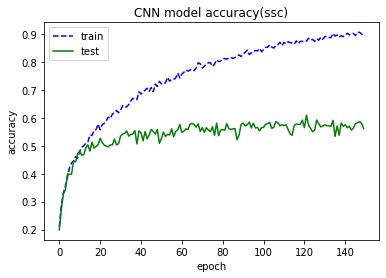

In [0]:
plt.plot(cnnhistory.history['accuracy'],'b', linestyle='--', label='train')
plt.plot(cnnhistory.history['val_accuracy'],'g', linestyle='-', label='test')
plt.title('CNN model accuracy(ssc)')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()

In [37]:
ssc_model = load_model('/content/gdrive/My Drive/Minor_Sem6/CNN Models(of features)/SSC.h5')
loss, acc = ssc_model.evaluate(x_testcnn, y_test_ssc)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))
s=acc
# print(s)

957/957 [==============================] - 0s 382us/step
Restored model, accuracy: 56.22%


# lpc

In [0]:
# Considering only lpc
X_train_lpc, X_test_lpc, y_train_lpc, y_test_lpc = train_test_split(X_lpc1, y1, test_size=0.2, random_state=0)
x_traincnn =np.expand_dims(X_train_lpc, axis=2)
x_testcnn= np.expand_dims(X_test_lpc, axis=2)

In [0]:
print(X_train_lpc.shape[1])

13


In [0]:
model = Sequential()

model.add(Conv1D(32, 5,padding='same',input_shape=(13,1)))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=(8)))

model.add(Conv1D(32, 5,padding='same',))
model.add(BatchNormalization())                  
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=(8),padding='same'))
model.add(Dropout(0.1))

model.add(Conv1D(32, 5,padding='same',))                  
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Conv1D(32, 5,padding='same',)) 
model.add(BatchNormalization())                 
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Flatten())
model.add(Dense(8))                                                           
model.add(Activation('softmax'))
opt = keras.optimizers.rmsprop(lr=0.00005,epsilon=1e-08,rho=0.9,decay=0.0)

In [0]:
model.summary()

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_85 (Conv1D)           (None, 13, 32)            192       
_________________________________________________________________
activation_104 (Activation)  (None, 13, 32)            0         
_________________________________________________________________
dropout_81 (Dropout)         (None, 13, 32)            0         
_________________________________________________________________
max_pooling1d_46 (MaxPooling (None, 1, 32)             0         
_________________________________________________________________
conv1d_86 (Conv1D)           (None, 1, 32)             5152      
_________________________________________________________________
batch_normalization_43 (Batc (None, 1, 32)             128       
_________________________________________________________________
activation_105 (Activation)  (None, 1, 32)           

In [0]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=opt,metrics=['accuracy'])
cnnhistory=model.fit(x_traincnn, y_train_lpc, batch_size=20, epochs=150, validation_data=(x_testcnn, y_test_lpc))
model.save('/content/gdrive/My Drive/feature/LPC.h5')

Train on 3828 samples, validate on 957 samples
Epoch 1/150
3828/3828 [==============================] - 1s 271us/step - loss: 2.2567 - accuracy: 0.1296 - val_loss: 2.0808 - val_accuracy: 0.1233
Epoch 2/150
3828/3828 [==============================] - 1s 143us/step - loss: 2.1803 - accuracy: 0.1450 - val_loss: 2.0716 - val_accuracy: 0.1296
Epoch 3/150
3828/3828 [==============================] - 1s 140us/step - loss: 2.1555 - accuracy: 0.1507 - val_loss: 2.0424 - val_accuracy: 0.1672
Epoch 4/150
3828/3828 [==============================] - 1s 146us/step - loss: 2.1222 - accuracy: 0.1664 - val_loss: 2.0336 - val_accuracy: 0.1944
Epoch 5/150
3828/3828 [==============================] - 1s 163us/step - loss: 2.1177 - accuracy: 0.1761 - val_loss: 2.0283 - val_accuracy: 0.2069
Epoch 6/150
3828/3828 [==============================] - 1s 138us/step - loss: 2.1028 - accuracy: 0.1719 - val_loss: 2.0204 - val_accuracy: 0.2059
Epoch 7/150
3828/3828 [==============================] - 1s 141us/step 

In [0]:
from keras.models import load_model

In [0]:
lpc_accuracy = cnnhistory.history['val_accuracy']
lpc_model = model
print(lpc_accuracy)

[0.12330198287963867, 0.1295715719461441, 0.16718913614749908, 0.19435736536979675, 0.2068965584039688, 0.20585161447525024, 0.19749216735363007, 0.21003134548664093, 0.20794148743152618, 0.21630093455314636, 0.215256005525589, 0.21630093455314636, 0.21734587848186493, 0.22048066556453705, 0.22675025463104248, 0.21943573653697968, 0.215256005525589, 0.215256005525589, 0.2257053256034851, 0.22675025463104248, 0.222570538520813, 0.2257053256034851, 0.22884012758731842, 0.23092998564243317, 0.22675025463104248, 0.22048066556453705, 0.2330198585987091, 0.23510971665382385, 0.23824451863765717, 0.23406478762626648, 0.23510971665382385, 0.24346917867660522, 0.23197491466999054, 0.23824451863765717, 0.2518286406993866, 0.2330198585987091, 0.24869383871555328, 0.25287356972694397, 0.24869383871555328, 0.2476489096879959, 0.24973876774311066, 0.24555903673171997, 0.25705328583717346, 0.2518286406993866, 0.2445141077041626, 0.25705328583717346, 0.25809821486473083, 0.26123303174972534, 0.2570532

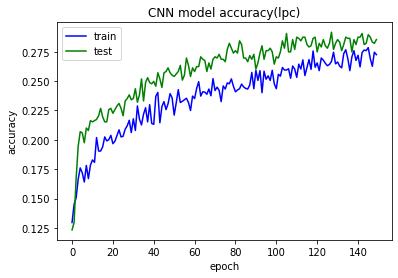

In [0]:
plt.plot(cnnhistory.history['accuracy'],'b', linestyle='-', label='train')
plt.plot(cnnhistory.history['val_accuracy'],'g', linestyle='-', label='test')
plt.title('CNN model accuracy(lpc)')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()

In [39]:
lpc_model = load_model('/content/gdrive/My Drive/Minor_Sem6/CNN Models(of features)/LPC.h5')
loss, acc = lpc_model.evaluate(x_testcnn, y_test_lpc)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))
l=acc


957/957 [==============================] - 0s 126us/step
Restored model, accuracy: 28.53%


# Final result

In [0]:
# printing all CNN Classifiers accuracy
print(mfcc_ssc_lpc_accuracy)
print(mfcc_ssc_accuracy)
print(mfcc_lpc_accuracy)
print(ssc_lpc_accuracy)
print(mfcc_accuracy)
print(ssc_accuracy)
print(lpc_accuracy)

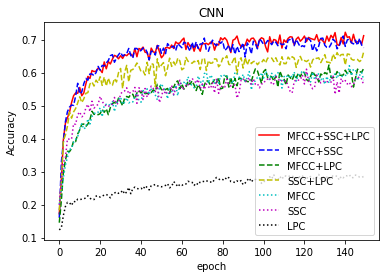

In [0]:
# Plotting CNN result


plt.plot( mfcc_ssc_lpc_accuracy, 'r', linestyle='-', label='MFCC+SSC+LPC')
plt.plot( mfcc_ssc_accuracy, 'b', linestyle='--', label='MFCC+SSC')
plt.plot( mfcc_lpc_accuracy, 'g', linestyle='--', label='MFCC+LPC')
plt.plot( ssc_lpc_accuracy, 'y', linestyle='--', label='SSC+LPC')
plt.plot( mfcc_accuracy, 'c', linestyle=':', label='MFCC')
plt.plot( ssc_accuracy, 'm', linestyle=':', label='SSC')
plt.plot( lpc_accuracy, 'k', linestyle=':', label='LPC')
plt.title('CNN')
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [0]:
label = ['MFCC+SSC+LPC','MFCC+SSC','MFCC+LPC','SSC+LPC','MFCC','SSC','LPC']
val=[msl,ms,ml,sl,m,s,l]
index = np.arange(len(label))
plt.bar(index, val)
# plt.text(index,val,str(index))
plt.xlabel('Features', fontsize=9)
plt.ylabel('Accuracy', fontsize=9)
plt.xticks(index, label, fontsize=10, rotation=45)
plt.title('CNN')
plt.show()

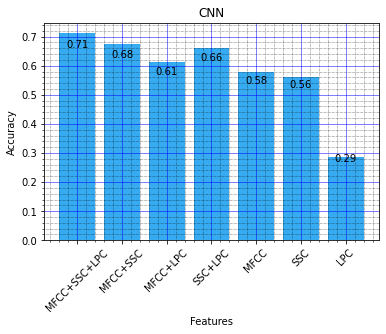

In [59]:
import matplotlib.pyplot as plt
x = ['MFCC+SSC+LPC','MFCC+SSC','MFCC+LPC','SSC+LPC','MFCC','SSC','LPC']
popularity = [msl,ms,ml,sl,m,s,l]
x_pos = [i for i, _ in enumerate(x)]

fig, ax = plt.subplots()
rects1 = ax.bar(x_pos, popularity, color='#36abf1')
plt.xlabel('Features')
plt.ylabel('Accuracy')
plt.title('CNN')
plt.xticks(x_pos, x ,fontsize=10, rotation=45)

plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='blue')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
def autolabel(rects):
    
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 0.92*height,'%.2f' % float(height),ha='center', va='bottom')
autolabel(rects1)

plt.show()
